Terkadang kita perlu melakukan preprocessing.
<br>Misalnya model belum paham gambar yang miring, so kita bisa tambahkan data dengan melakukan rotasinya.

Keuntungannya :
1. menambah data
2. membuat model mengetahui generalisasi data (model jadi lebih memahami gambar walaupun posisinya berbeda) dan mengurangi overfit

# 1. Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator

# 2. Extract Picture

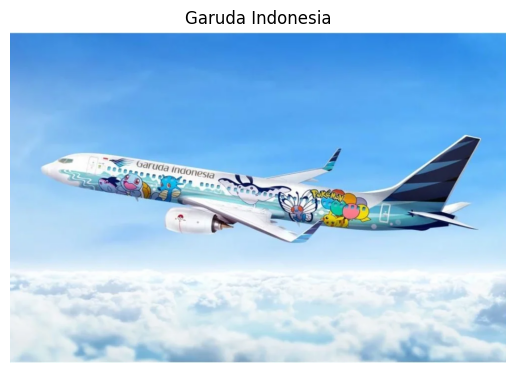

In [3]:
img = load_img('/content/garuda_indonesia.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Garuda Indonesia');

# 4. Convert Image to Array
ormal shape of images (n,H,W,C) :
- n : number of images
- H : height
- W : width
- C : number of images channel

In [6]:
img_array = img_to_array(img)
img_array.shape

(667, 1000, 3)

In [7]:
## change image shape to nHWC
img_array = np.expand_dims(img_array,axis=0)
img_array.shape

(1, 667, 1000, 3)

# 4. Image Augmentation by Transformation

In [8]:
def plot_transformed_images():
    train_generator = datagen.flow(img_array, batch_size=1)
    rows = 5
    columns = 4
    fig, axes = plt.subplots(rows,columns)
    for r in range(rows):
        for c in range(columns):
            image_batch = train_generator.next()

            image = image_batch[0].astype('uint8')
            axes[r,c].imshow(image)
    fig.set_size_inches(15,10)

__Catatan__
<br>Contohnya :
<br>kita akan mengklasifikasi angka dari gambarnya. Angka 9 kalau diflip akan mengubah maknanya. So, jangan sampai jenis transformasi yang dipakai mengubah makna.

## 4.1. Vertical Shift

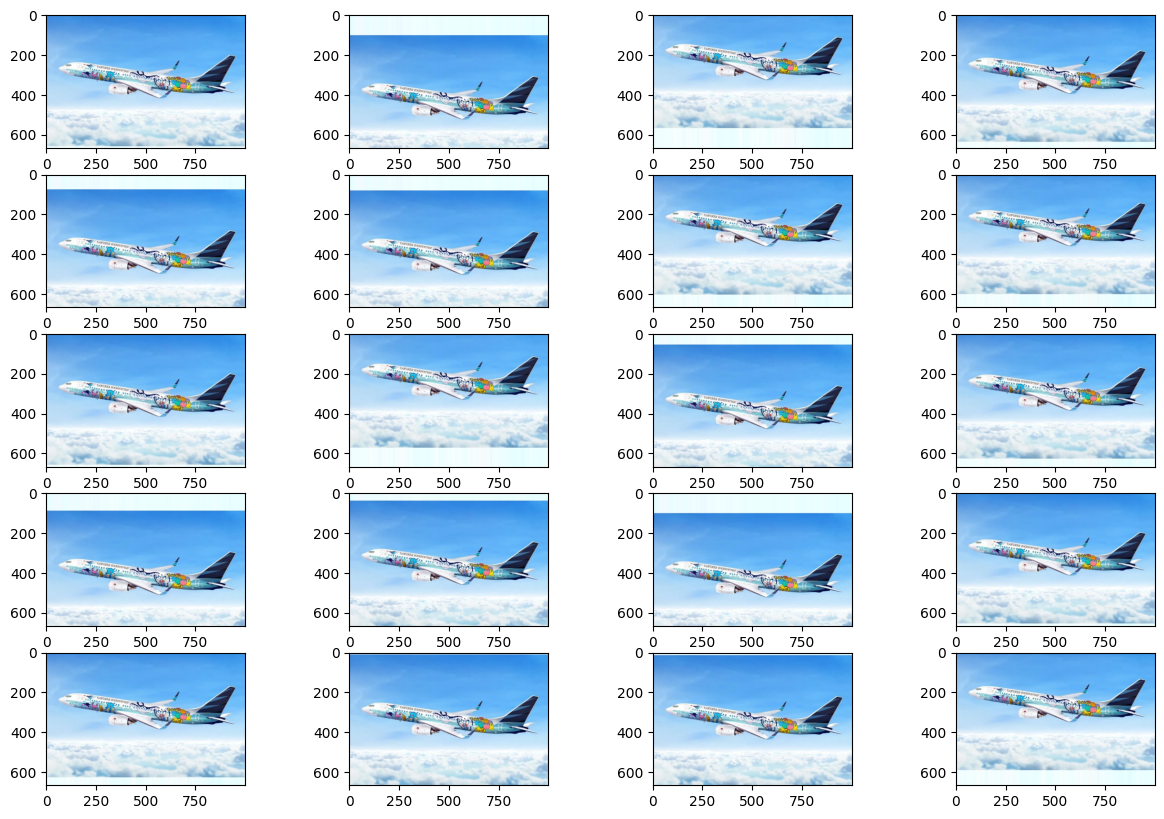

In [11]:
datagen = ImageDataGenerator(width_shift_range=0.1)
plot_transformed_images()

## 4.2. Combination

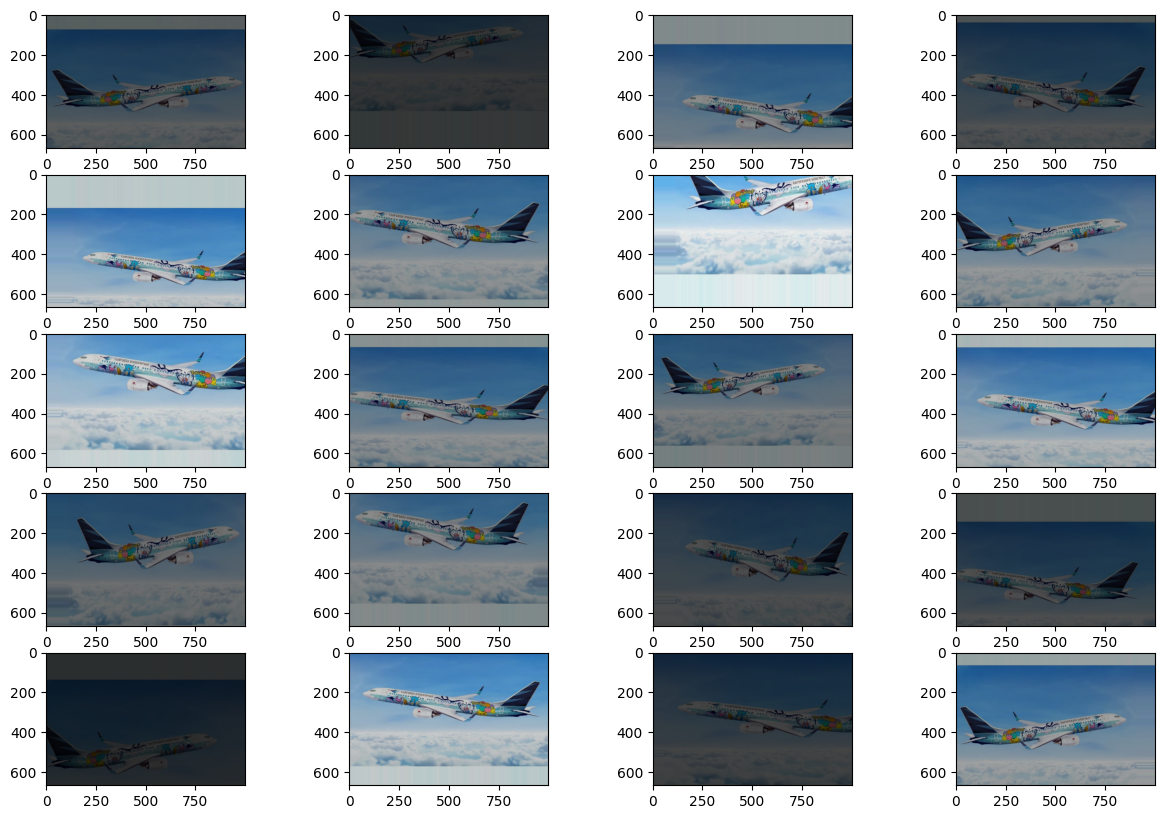

In [13]:
datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             brightness_range=[0.15,1.0],
                             zoom_range=[0.8,1.1])

plot_transformed_images()